In [1]:
#Librerías para manejo de datos
import pandas as pd
import numpy as np

#Librerías para gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías para modelar
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans

#Librería para tendencia al cluster
from pyclustertend import hopkins
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

#Librerías para visualización de barrios
import geopandas as gp
from seaborn import color_palette

In [2]:
plt.rcParams['figure.figsize'] = (24,14)
plt.rcParams.update({'font.size': 18})
df = pd.read_csv('/work/properati_argentina_2021_filtrado.csv')

In [3]:
df_numerico = df.copy()
# Creo diccionario asignandole a cada ciudad (valor) una clave numerica aplicando el método Label Encoder
class_mapping_ciudad = {label:idx for idx, label in enumerate(np.unique(df_numerico['place_l3']))}
class_mapping_property_type = {label:idx for idx, label in enumerate(np.unique(df_numerico['property_type']))}

# Cambio los valores por sus claves numericas asociadas
df_numerico['place_l3'] = df_numerico['place_l3'].map(class_mapping_ciudad)
df_numerico['property_type'] = df_numerico['property_type'].map(class_mapping_property_type)

df_numerico.head()

,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price
0,-34.589974,-58.459133,26,0,4,3,171.000000,133.0,210000.0
1,-34.637319,-58.361124,7,1,3,2,58.000000,55.0,82900.0
2,-34.628647,-58.361871,7,1,4,3,70.000000,70.0,99000.0
3,-34.610027,-58.401934,25,1,4,2,135.327513,104.0,146000.0
4,-34.631621,-58.416825,8,2,4,2,106.415511,73.0,250000.0


### En este punto se busca analizar si es posible agrupar los datos en función de algún criterio. Para esta tarea utilizar el algoritmo K-Means

# Ejercicio 2

En este punto se busca analizar si es posible agrupar los datos en función de algún criterio. Para
esta tarea utilizar el algoritmo K-Means y se deberán realizar los siguientes puntos:

● Analizar la tendencia al clustering del dataset.
● Estimar la cantidad apropiada de grupos que se deben formar.
● Evaluar la calidad de los grupos formados realizando un análisis de Silhouette.
● Realizar un análisis de cada grupo intentando entender en función de qué
características fueron formados.
● Graficar sobre un mapa de CABA los avisos coloreados según el grupo al que
pertenecen.
● Repetir el análisis anterior, utilizando sólo 3 grupos.

In [4]:
from sklearn.preprocessing import scale, MinMaxScaler

scaler = MinMaxScaler()
df_escalado = scaler.fit_transform(df_numerico)

Inicialmente se graficará un pairplot para predecir si hay algún par de variables con tendencia al clustering visualmente.

In [5]:
#sns.pairplot(df_numerico)

Se observa que algunos candidatos con tendencia al agrupamiento son:

- place_l3 - property_rooms

- place_l3 - property_bedrooms

- property_type - property_rooms (como grupos en vertical)

## Analizar la tendencia al clustering del dataset.

Para cada par de variables del dataset numérico buscaremos el coeficiente de hopkins para analizar su tendencia al clustering

In [6]:
"""hopkins_coefficients =[]
for i in range(df_numerico.shape[1]):
    for j in range(i):
        if(i!=j):
            hopkins_coefficients.append([hopkins(df_numerico.iloc[:,[i,j]], df_numerico.shape[0]),df_numerico.columns[i],df_numerico.columns[j]])

hopkins_coefficients
"""
#df_numerico.shape[1]

'hopkins_coefficients =[]\nfor i in range(df_numerico.shape[1]):\n    for j in range(i):\n        if(i!=j):\n            hopkins_coefficients.append([hopkins(df_numerico.iloc[:,[i,j]], df_numerico.shape[0]),df_numerico.columns[i],df_numerico.columns[j]])\n\nhopkins_coefficients\n'

In [7]:
#hopkins_coefficients.sort(reverse=True oki)
#hopkins_coefficients

Se observa que los valores más cercanos a 1 (tendencia al cluster) se obtienen con el par property_rooms - place_l3 y con property_bedrooms - place_l3. Por el contrario, los más cercanos a 0 (tendencia uniforme) son property_bedrooms - property_rooms y con property_bedrooms - latitud.

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


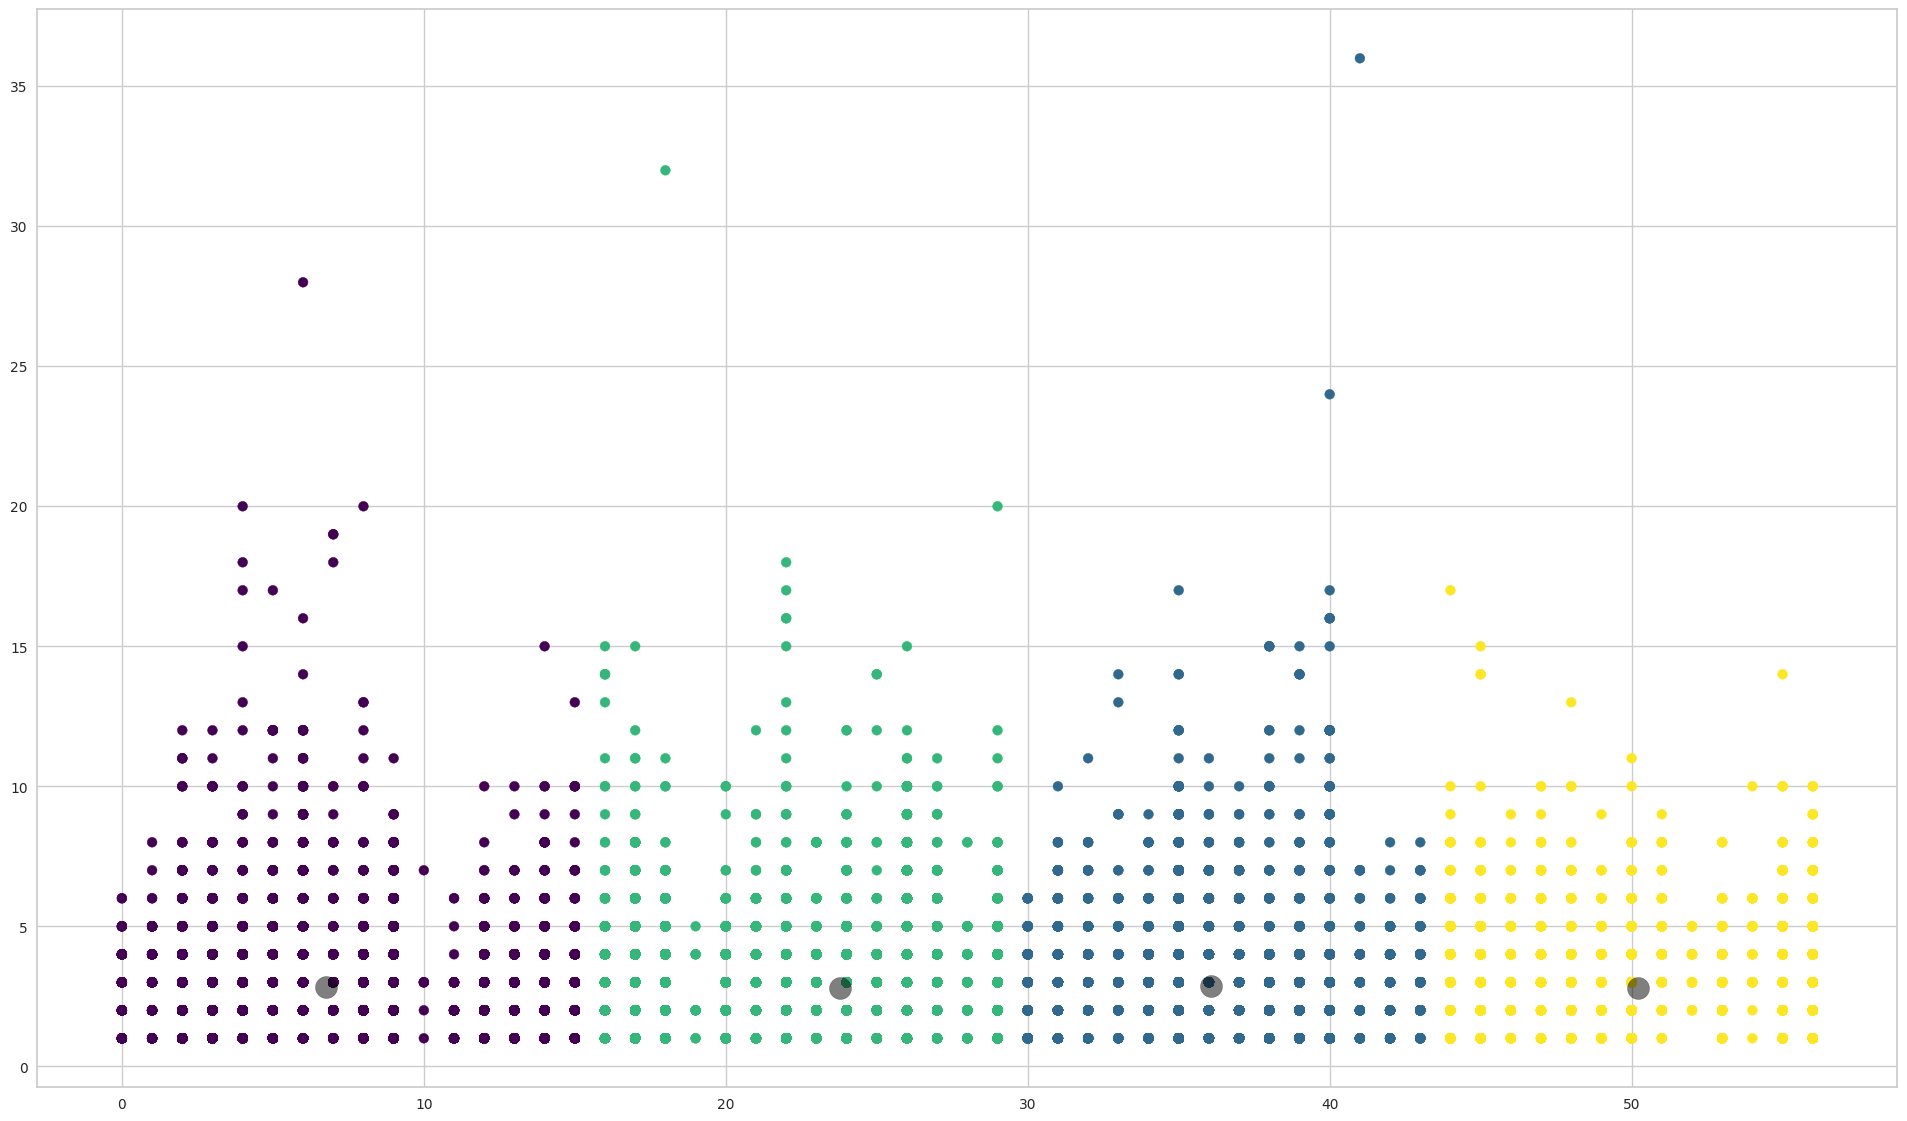

In [8]:
kmeans = KMeans(random_state=2,n_clusters=4)
y_kmeans = kmeans.fit_predict(df_numerico[["place_l3","property_rooms"]])

plt.scatter(df_numerico.place_l3, df_numerico.property_rooms, c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=1000, alpha=0.5,marker='.')
plt.show()

Kmeans tomando una cantidad arbitraria de clusters = 4. Se observa que hay una tendencia de agrupamiento.

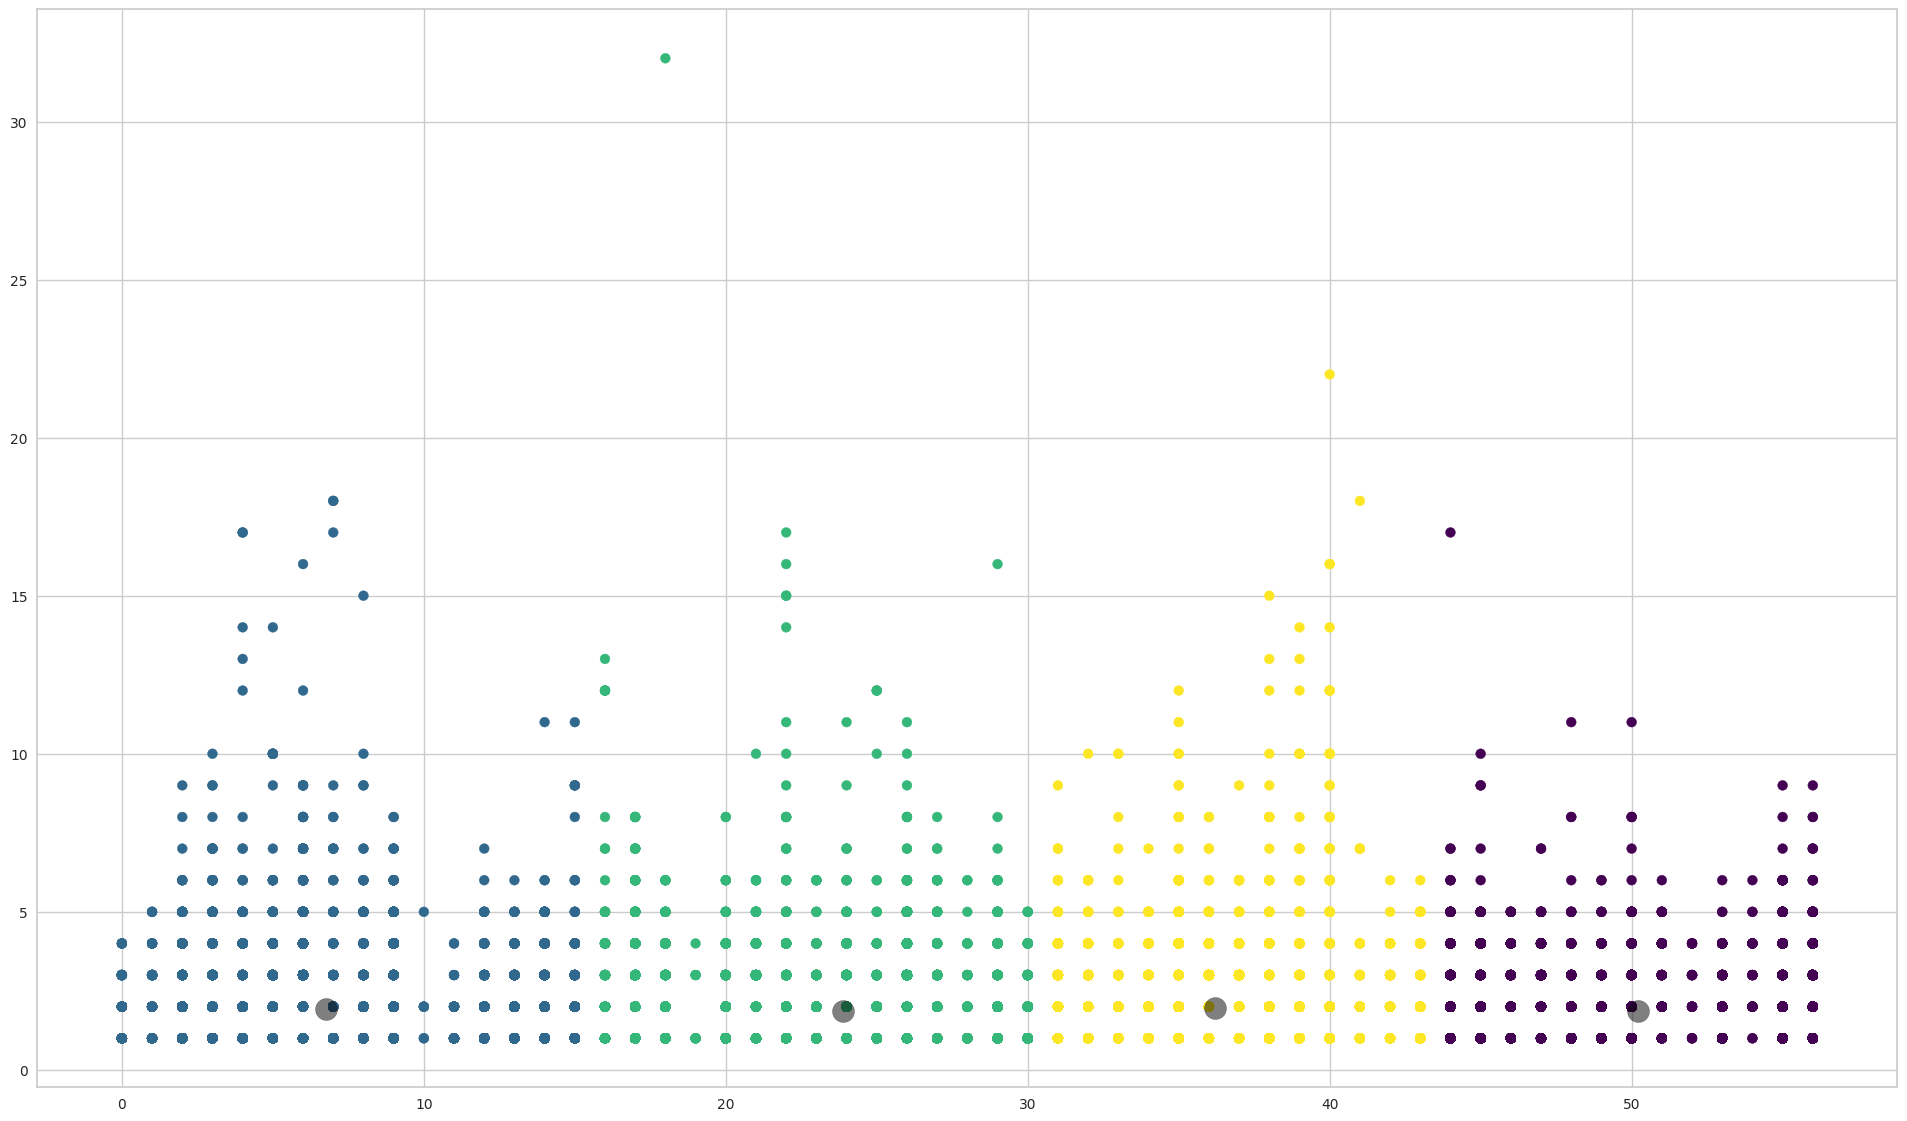

In [9]:
kmeans = KMeans(random_state=2,n_clusters=4)
y_kmeans = kmeans.fit_predict(df_numerico[["place_l3","property_bedrooms"]])

plt.scatter(df_numerico.place_l3, df_numerico.property_bedrooms, c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=1000, alpha=0.5,marker='.')
plt.show()

Con el par property_bedrooms y place_l3 también se observa la tendencia al agrupamiento.

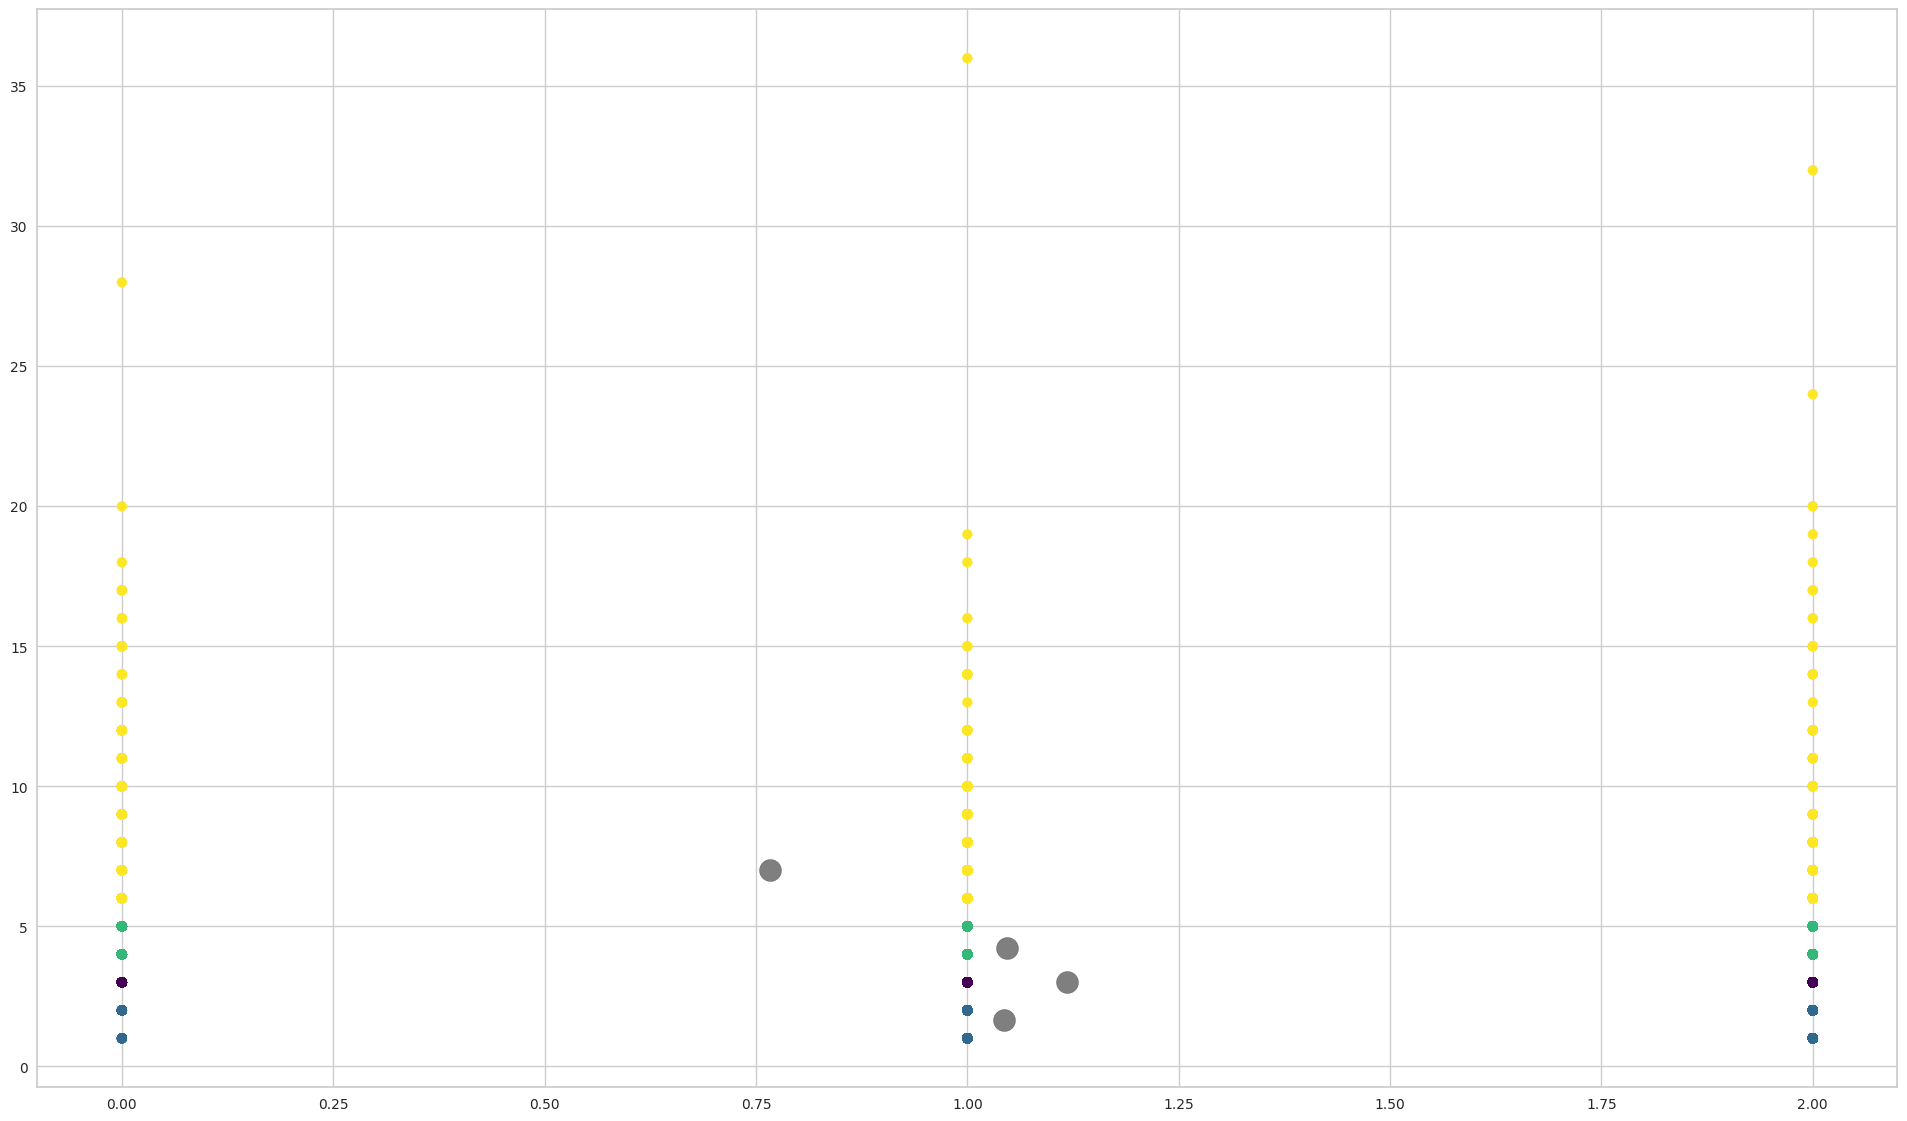

In [10]:
kmeans = KMeans(random_state=2,n_clusters=4)
y_kmeans = kmeans.fit_predict(df_numerico[["property_type","property_rooms"]])

plt.scatter(df_numerico.property_type, df_numerico.property_rooms, c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=1000, alpha=0.5,marker='.')
plt.show()

Aplicando kmeans con las variables property_rooms y property_type se observa que no hay tendencia al agrupamiento y los centroides se ubican erróneamente.

In [11]:
from sklearn.metrics import pairwise_distances_argmin

df_kmeans = df_numerico[['property_rooms', 'place_l3']]

kmeans_ = KMeans(3, random_state=2)

kmeans_.fit(df_kmeans)

clusters=kmeans.predict(df_kmeans)
print(clusters)

[3 3 3 ... 3 3 3]
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- place_l3
Feature names seen at fit time, yet now missing:
- property_type

  warnings.warn(message, FutureWarning)


In [12]:
validacion_externa=pd.DataFrame(zip(df_kmeans,clusters),columns=['labels_reales','clusters'])
validacion_externa.head()

,labels_reales,clusters
0,property_rooms,3
1,place_l3,3


In [13]:
pd.crosstab(validacion_externa.labels_reales,validacion_externa.clusters)

clusters,3
labels_reales,
place_l3,1
property_rooms,1


## Estimar la cantidad apropiada de grupos que se deben formar.

In [14]:

"""
labels = KMeans(3, random_state=2).fit_predict(df_kmeans)
plt.scatter(df_kmeans[:, 0], df_kmeans[:, 1], c=labels,
            s=50, cmap='viridis',marker=".")
plt.show()
"""

'\nlabels = KMeans(3, random_state=0).fit_predict(df_kmeans)\nplt.scatter(df_kmeans[:, 0], df_kmeans[:, 1], c=labels,\n            s=50, cmap=\'viridis\',marker=".")\nplt.show()\n'

### Método Elbow

Se aplicará el método Elbow para observar que cantidad de clusters  brinda el mejor agrupamiento

In [15]:

"""sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(df_kmeans)
    sse.append(km.inertia_)

# Grafico el SSE por K
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Cantidad de clusters')
plt.ylabel('SSE')
plt.show()"""


"sse = []\nlist_k = list(range(1, 10))\n\nfor k in list_k:\n    km = KMeans(n_clusters=k)\n    km.fit(df_kmeans)\n    sse.append(km.inertia_)\n\n# Grafico el SSE por K\nplt.figure(figsize=(6, 6))\nplt.plot(list_k, sse, '-o')\nplt.xlabel(r'Cantidad de clusters')\nplt.ylabel('SSE')\nplt.show()"

Según el gráfico provisto, la pendiente se terminar de "quebrar" en cantidad = 3, observándose que a partir de 3 hay una tendencia de una pendiente cada vez más suave. Es por esto que n_clusters=3 es un buen candidato para estimar la cantidad apropiada.

In [16]:
"""
list_k = list(range(2, 5))

for k in list_k:
    clusterer = KMeans(n_clusters=k)
    preds = clusterer.fit_predict(df_kmeans)

    score = silhouette_score (df_kmeans, preds)
    print ("Para =" + str(k) + " clusters silhouette score es " + str(score))
"""

'\nlist_k = list(range(2, 5))\n\nfor k in list_k:\n    clusterer = KMeans(n_clusters=k)\n    preds = clusterer.fit_predict(df_kmeans)\n\n    score = silhouette_score (df_kmeans, preds)\n    print ("Para =" + str(k) + " clusters silhouette score es " + str(score))\n'

In [17]:
"""from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(4, random_state=2)

# Visualizamos el gráfico de silueta
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')    # Instancio el visualizador
visualizer.fit(df_kmeans)
plt.show()"""

"from yellowbrick.cluster import SilhouetteVisualizer\n\nmodel = KMeans(4, random_state=0)\n\n# Visualizamos el gráfico de silueta\nvisualizer = SilhouetteVisualizer(model, colors='yellowbrick')    # Instancio el visualizador\nvisualizer.fit(df_kmeans)\nplt.show()"

## Realizar un análisis de cada grupo intentando entender en función de qué características fueron formados

## Graficar sobre un mapa de CABA los avisos coloreados según el grupo al que pertenecen

### Visualización en mapa

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


<AxesSubplot:title={'center':'Barrios de CABA y clusters'}, xlabel='Longitud', ylabel='Latitud'>

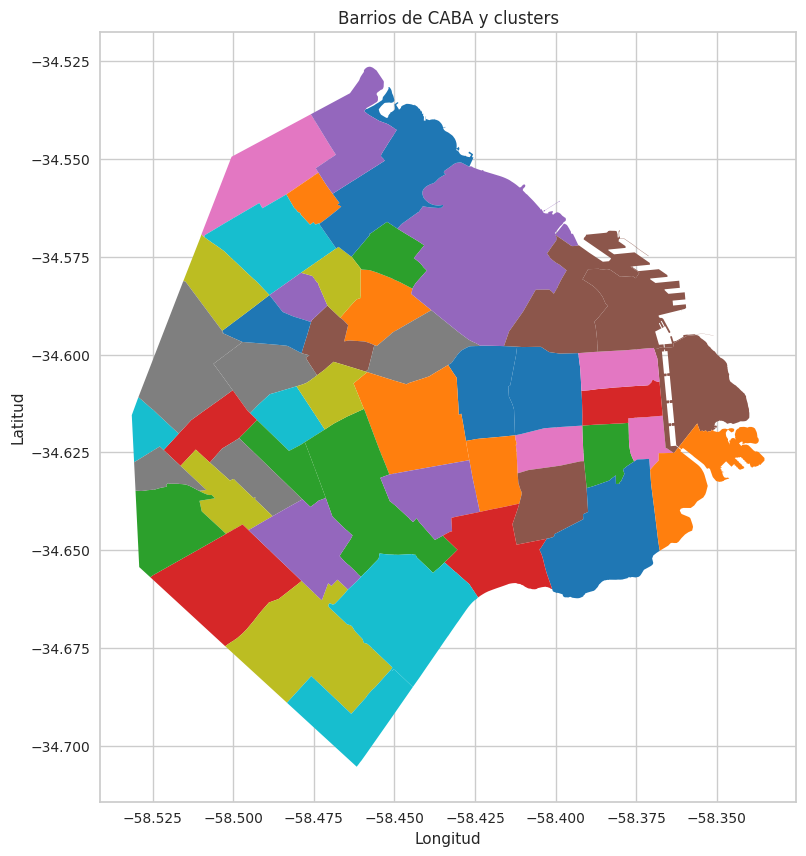

In [18]:
kmeans = KMeans(random_state=2,n_clusters=4)
y_kmeans = kmeans.fit_predict(df_numerico[["place_l3","property_rooms"]])

fig, ax = plt.subplots(figsize=(10,10))
barrios = gp.read_file("barrios.geojson")
ax.set_title('Barrios de CABA y clusters')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
barrios.plot(ax=ax,column='BARRIO')

#puntos = gp.GeoDataFrame(df_numerico[["place_l3","property_rooms"]], geometry=gp.points_from_xy(df_numerico.longitud, df_numerico.latitud))    
#puntos.plot(ax=ax,c = y_kmeans,markersize=10)
#plt.show()

## Repetir el análisis anterior, utilizando sólo 3 grupos

# Ejercicio 3

## Construccion del target

Para esta tarea se debe crear una nueva variable tipo_precio que tendrá tres categorías: alto, medio, bajo. Esta nueva variable será nuestra clase en el problema de clasificación.
Para determinar cuándo el tipo_precio de una propiedad es alto, medio o bajo se deberá analizar el precio por metro cuadrado (pxm2). Se propone evaluar las siguientes alternativas para establecer los límites de cada categoría.

In [43]:
df_tprecio = df.copy()
df_tprecio['pxm2'] = round(df_tprecio["property_price"] / df_tprecio['property_surface_total'], 0)
df_tprecio

,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,pxm2
0,-34.589974,-58.459133,Palermo,Casa,4,3,171.000000,133.0,210000.0,1228.0
1,-34.637319,-58.361124,Boca,Departamento,3,2,58.000000,55.0,82900.0,1429.0
2,-34.628647,-58.361871,Boca,Departamento,4,3,70.000000,70.0,99000.0,1414.0
3,-34.610027,-58.401934,Once,Departamento,4,2,135.327513,104.0,146000.0,1079.0
4,-34.631621,-58.416825,Boedo,PH,4,2,106.415511,73.0,250000.0,2349.0
...,...,...,...,...,...,...,...,...,...,...
82909,-34.603245,-58.489810,Villa del Parque,Departamento,4,3,130.000000,100.0,220000.0,1692.0
82910,-34.614063,-58.482814,Villa del Parque,Departamento,3,2,68.000000,60.0,161000.0,2368.0
82911,-34.614175,-58.479062,Villa del Parque,Departamento,1,1,51.000000,30.0,75500.0,1480.0
82912,-34.614175,-58.479062,Villa del Parque,Departamento,1,1,37.000000,31.0,74500.0,2014.0


### Dividir la variable pxm2 en 3 intervalos con igual cantidad de observaciones.

In [20]:
df_tprecio1 = df_tprecio.copy()

In [21]:
df_tprecio1["tipo_precio"] = pd.qcut( df_tprecio1["pxm2"],
                            q=3, # Separo en tres categorias iguales
                            labels=["bajo", "medio", "alto"])

df_tprecio1

,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,pxm2,tipo_precio
0,-34.589974,-58.459133,Palermo,Casa,4,3,171.000000,133.0,210000.0,1228.0,bajo
1,-34.637319,-58.361124,Boca,Departamento,3,2,58.000000,55.0,82900.0,1429.0,bajo
2,-34.628647,-58.361871,Boca,Departamento,4,3,70.000000,70.0,99000.0,1414.0,bajo
3,-34.610027,-58.401934,Once,Departamento,4,2,135.327513,104.0,146000.0,1079.0,bajo
4,-34.631621,-58.416825,Boedo,PH,4,2,106.415511,73.0,250000.0,2349.0,medio
...,...,...,...,...,...,...,...,...,...,...,...
82909,-34.603245,-58.489810,Villa del Parque,Departamento,4,3,130.000000,100.0,220000.0,1692.0,bajo
82910,-34.614063,-58.482814,Villa del Parque,Departamento,3,2,68.000000,60.0,161000.0,2368.0,medio
82911,-34.614175,-58.479062,Villa del Parque,Departamento,1,1,51.000000,30.0,75500.0,1480.0,bajo
82912,-34.614175,-58.479062,Villa del Parque,Departamento,1,1,37.000000,31.0,74500.0,2014.0,medio


Verifico que se haya separado (aproximadamente) en partes iguales

In [22]:
df_tprecio1["tipo_precio"].value_counts()

bajo     27652
medio    27645
alto     27617
Name: tipo_precio, dtype: int64

### Dividir la variable pxm2 en 3 intervalos, el primero con el 25% de las observaciones, el siguiente con el 50% y el ultimo con el 25% de las observaciones restantes.

In [23]:
df_tprecio2 = df_tprecio.copy()

In [24]:
df_tprecio2["tipo_precio"] = pd.qcut( df_tprecio2["pxm2"],
                            [0, .25, .75, 1],
                            labels=["bajo", "medio", "alto"])

df_tprecio2

,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,pxm2,tipo_precio
0,-34.589974,-58.459133,Palermo,Casa,4,3,171.000000,133.0,210000.0,1228.0,bajo
1,-34.637319,-58.361124,Boca,Departamento,3,2,58.000000,55.0,82900.0,1429.0,bajo
2,-34.628647,-58.361871,Boca,Departamento,4,3,70.000000,70.0,99000.0,1414.0,bajo
3,-34.610027,-58.401934,Once,Departamento,4,2,135.327513,104.0,146000.0,1079.0,bajo
4,-34.631621,-58.416825,Boedo,PH,4,2,106.415511,73.0,250000.0,2349.0,medio
...,...,...,...,...,...,...,...,...,...,...,...
82909,-34.603245,-58.489810,Villa del Parque,Departamento,4,3,130.000000,100.0,220000.0,1692.0,bajo
82910,-34.614063,-58.482814,Villa del Parque,Departamento,3,2,68.000000,60.0,161000.0,2368.0,medio
82911,-34.614175,-58.479062,Villa del Parque,Departamento,1,1,51.000000,30.0,75500.0,1480.0,bajo
82912,-34.614175,-58.479062,Villa del Parque,Departamento,1,1,37.000000,31.0,74500.0,2014.0,medio


In [25]:
df_tprecio2["tipo_precio"].value_counts()

medio    41542
bajo     20742
alto     20630
Name: tipo_precio, dtype: int64

La categoria "medio" representa el 50% de las observaciones, mientras que tanto "bajo" como "alto" posee un 25% cada una.

### Trabajar la variable pxm2 relativa a cada tipo de propiedad y luego dividirla como en el punto anterior.

In [26]:
df_tprecio3 = df_tprecio.copy()

In [27]:
df_tprecio3["tipo_precio"] = df_tprecio3.groupby("property_type").apply(
                            lambda propiedad: 
                                pd.qcut(propiedad['pxm2'], 
                                [0, .25, .75, 1], 
                                labels=["bajo", "medio", "alto"]
                            )).reset_index(drop=True)

df_tprecio3

,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,pxm2,tipo_precio
0,-34.589974,-58.459133,Palermo,Casa,4,3,171.000000,133.0,210000.0,1228.0,medio
1,-34.637319,-58.361124,Boca,Departamento,3,2,58.000000,55.0,82900.0,1429.0,medio
2,-34.628647,-58.361871,Boca,Departamento,4,3,70.000000,70.0,99000.0,1414.0,medio
3,-34.610027,-58.401934,Once,Departamento,4,2,135.327513,104.0,146000.0,1079.0,alto
4,-34.631621,-58.416825,Boedo,PH,4,2,106.415511,73.0,250000.0,2349.0,medio
...,...,...,...,...,...,...,...,...,...,...,...
82909,-34.603245,-58.489810,Villa del Parque,Departamento,4,3,130.000000,100.0,220000.0,1692.0,medio
82910,-34.614063,-58.482814,Villa del Parque,Departamento,3,2,68.000000,60.0,161000.0,2368.0,alto
82911,-34.614175,-58.479062,Villa del Parque,Departamento,1,1,51.000000,30.0,75500.0,1480.0,alto
82912,-34.614175,-58.479062,Villa del Parque,Departamento,1,1,37.000000,31.0,74500.0,2014.0,alto


In [28]:
df_tprecio3["tipo_precio"].value_counts()

medio    41450
bajo     20744
alto     20720
Name: tipo_precio, dtype: int64

# Ejercicio 3a

### Mostrar la distribucion del precio por metro cuadrado.

<AxesSubplot:xlabel='property_surface_total', ylabel='pxm2'>

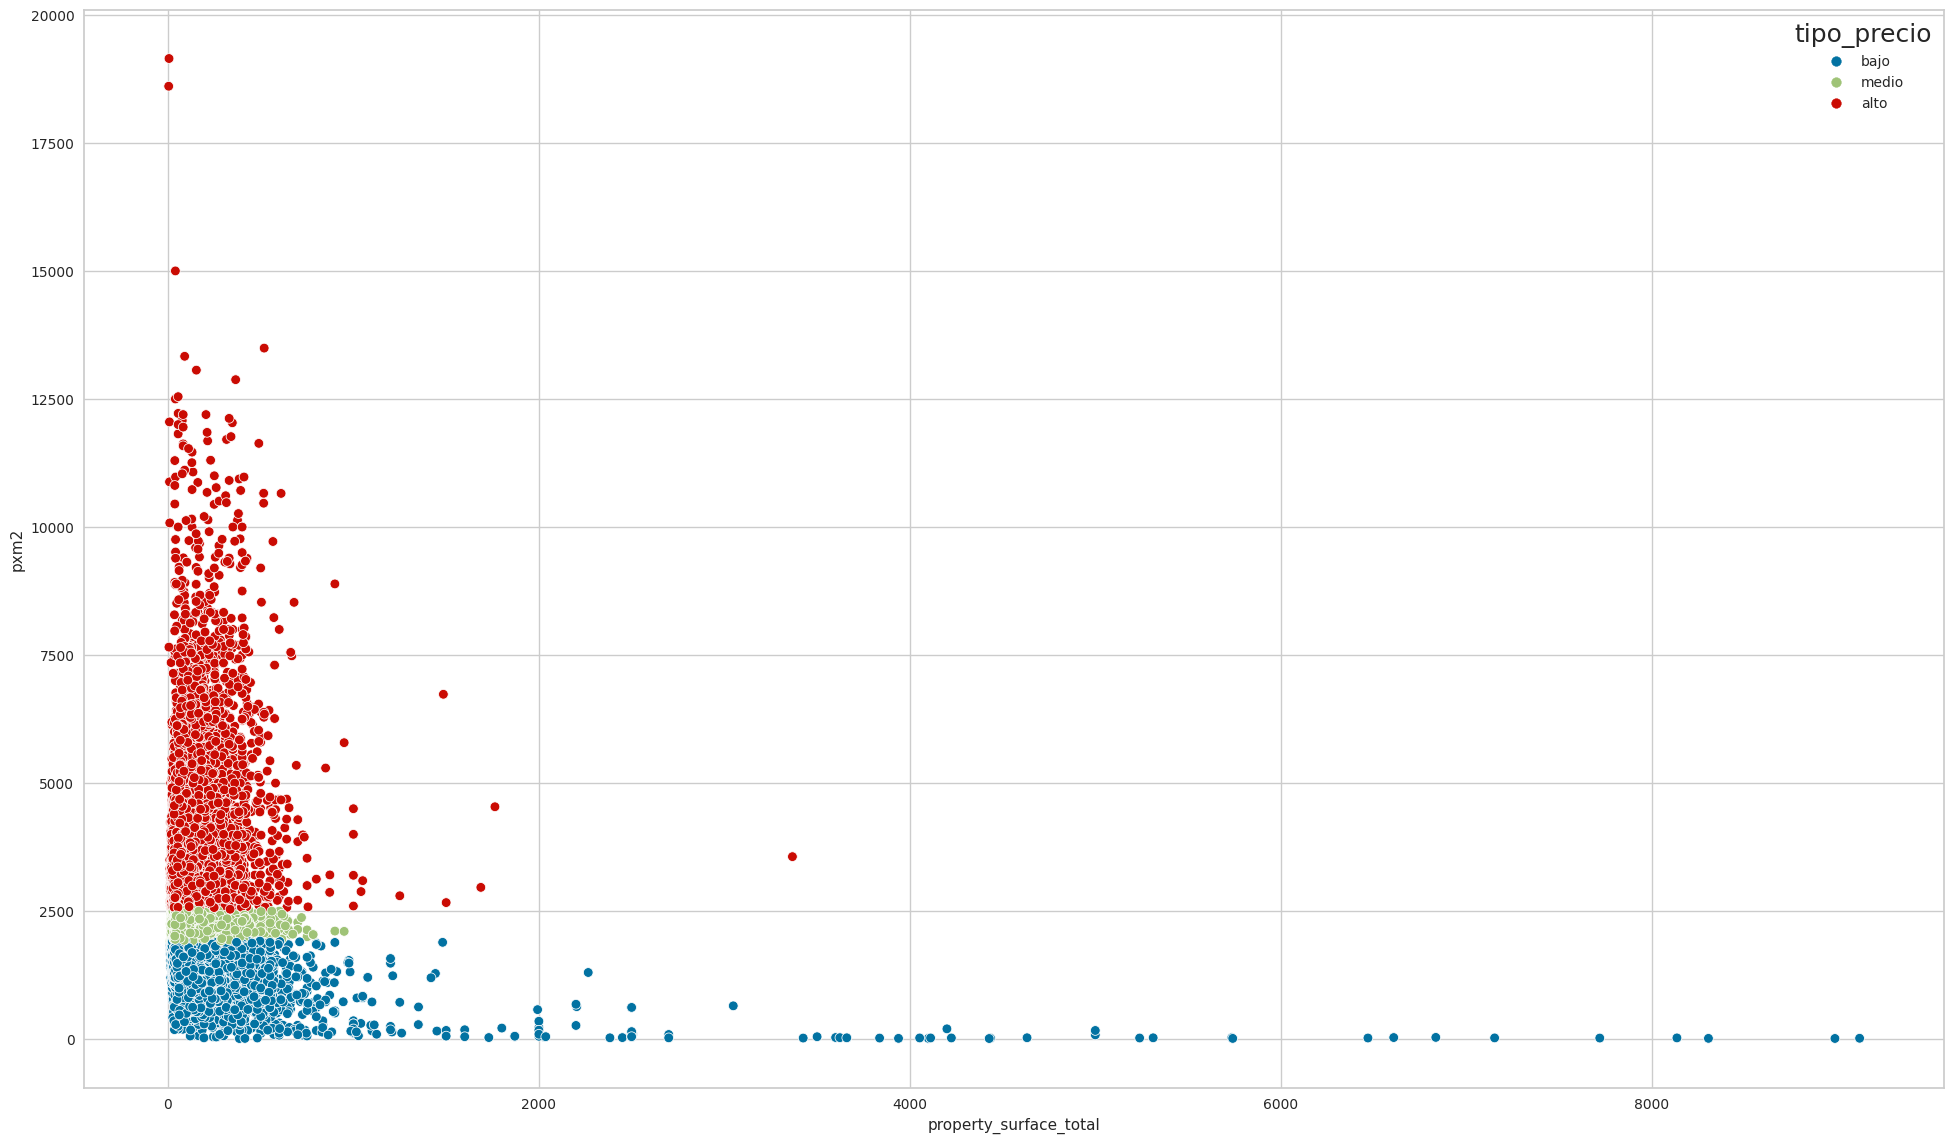

In [40]:
df_test = df_tprecio1[ df_tprecio1['property_surface_total'] < 10000 ]                      
df_test = df_test[df_test['pxm2'] < 20000]                     

sns.scatterplot(data=df_test, x='property_surface_total', y="pxm2", hue="tipo_precio") # reemplazar df_test por df_tprecio1 una vez arreglado

Distribución dividiendo el precio por metro cuadrado en partes iguales.

<AxesSubplot:xlabel='property_surface_total', ylabel='pxm2'>

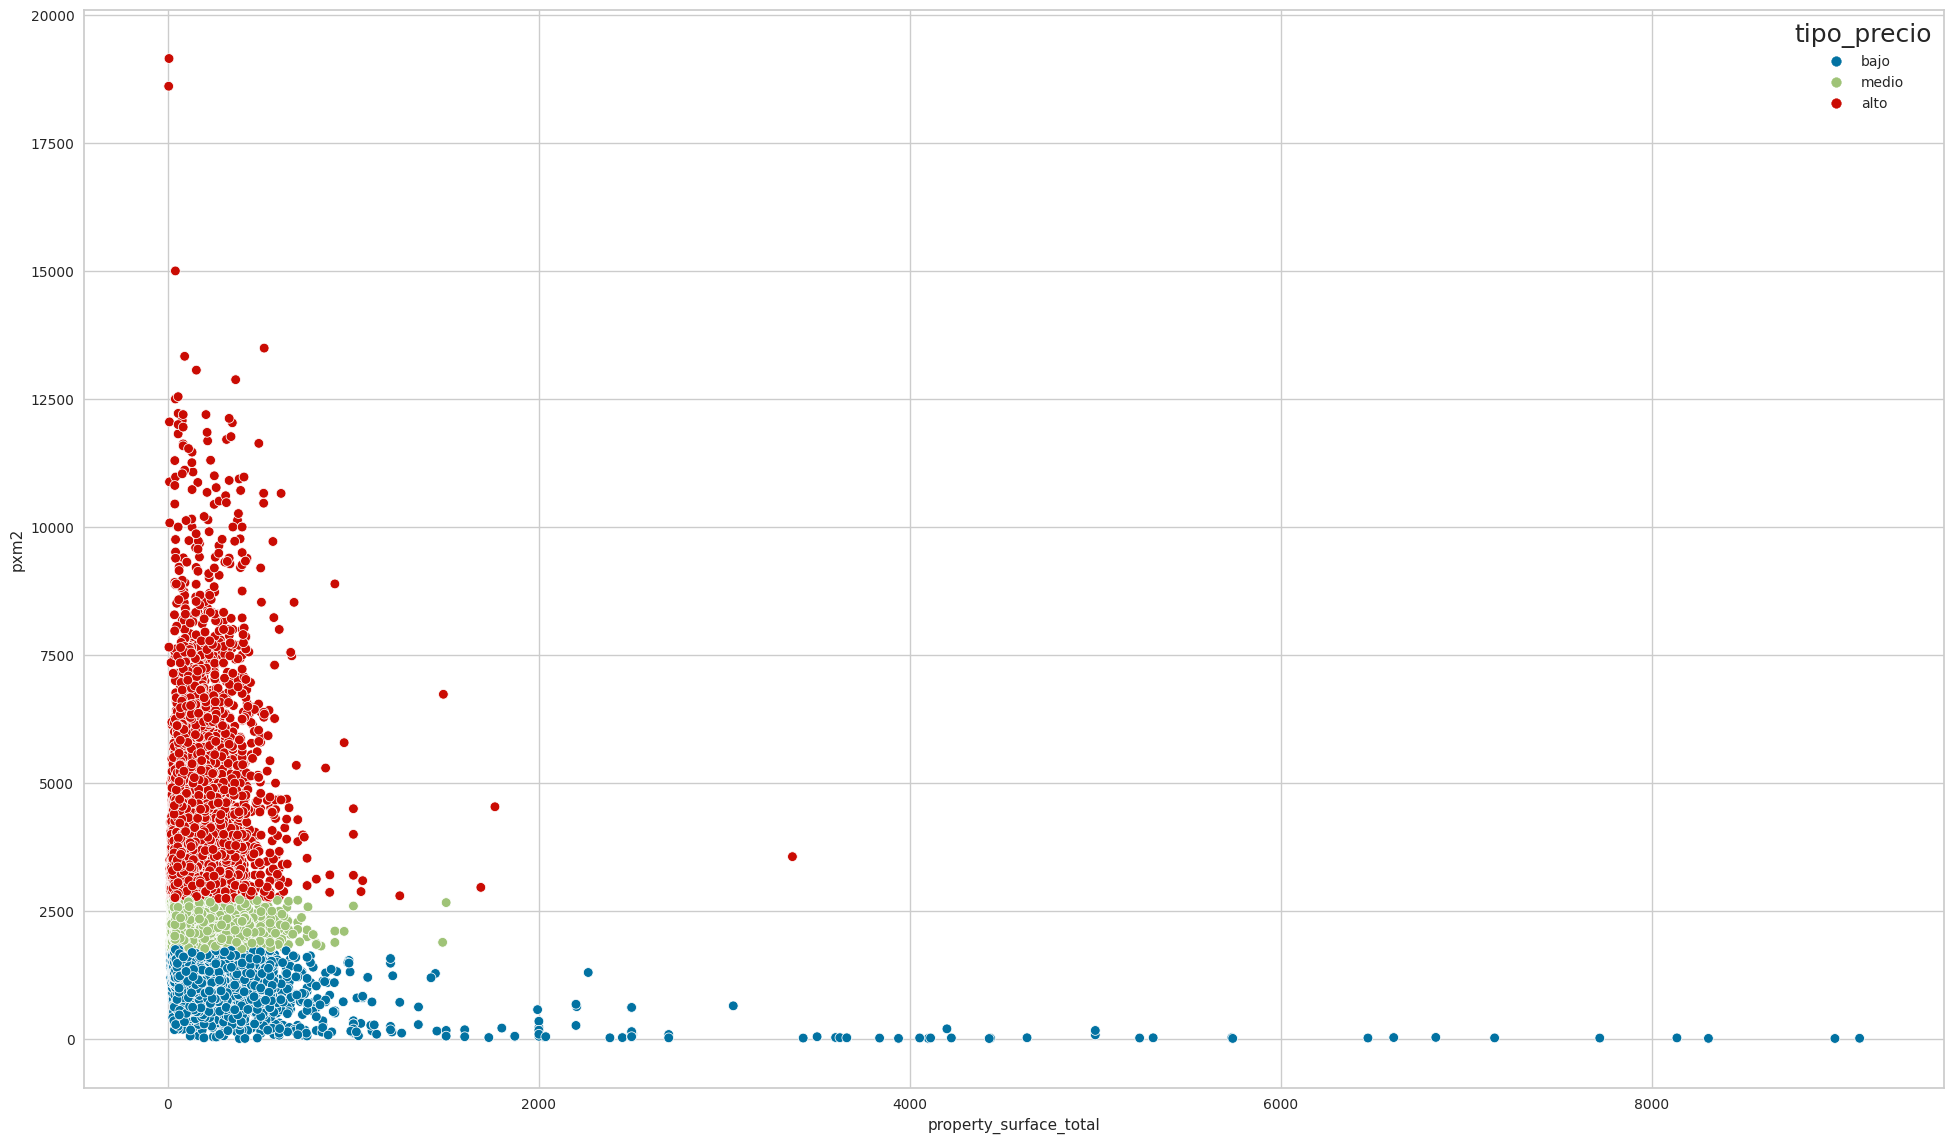

In [31]:
df_test = df_tprecio2[ df_tprecio2['property_surface_total'] < 10000 ]                      
df_test = df_test[df_test['pxm2'] < 20000]

sns.scatterplot(data=df_test, x='property_surface_total', y="pxm2", hue="tipo_precio") # reemplazar df_test por df_tprecio2 una vez arreglado

Distrubución 25% bajo, 50% medio, 25% alto.

<AxesSubplot:xlabel='property_surface_total', ylabel='pxm2'>

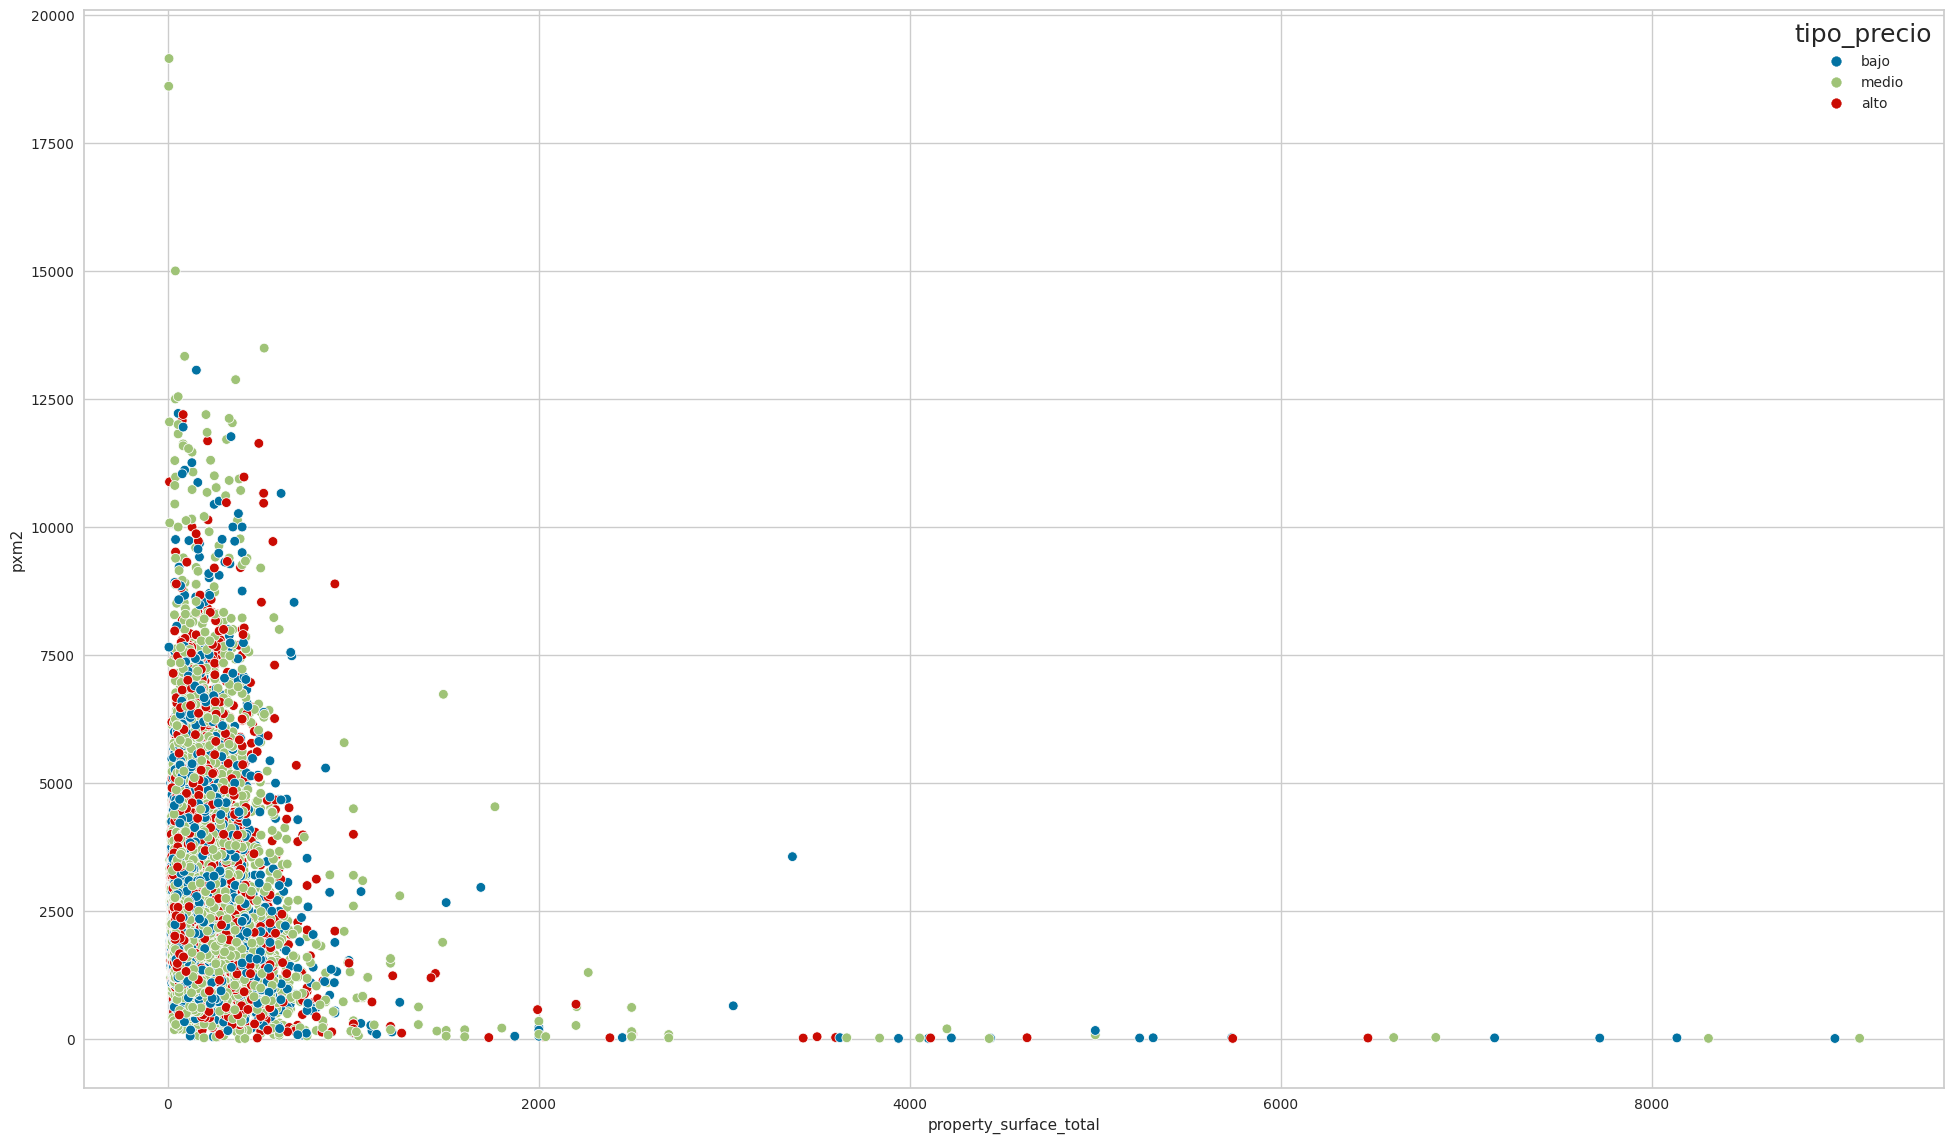

In [32]:
df_test = df_tprecio3[ df_tprecio3['property_surface_total'] < 10000 ]                      
df_test = df_test[df_test['pxm2'] < 20000]

sns.scatterplot(data=df_test, x='property_surface_total', y="pxm2", hue="tipo_precio") # reemplazar df_test por df_tprecio3 una vez arreglado

Distribucion agrupando previamente por tipo de propiedad, se observa como se mezclan las categorias a diferencia de los dos casos anteriores.

### Mostrar la distribucion del precio por metro cuadrado por tipo de propiedad

<AxesSubplot:xlabel='property_surface_total', ylabel='pxm2'>

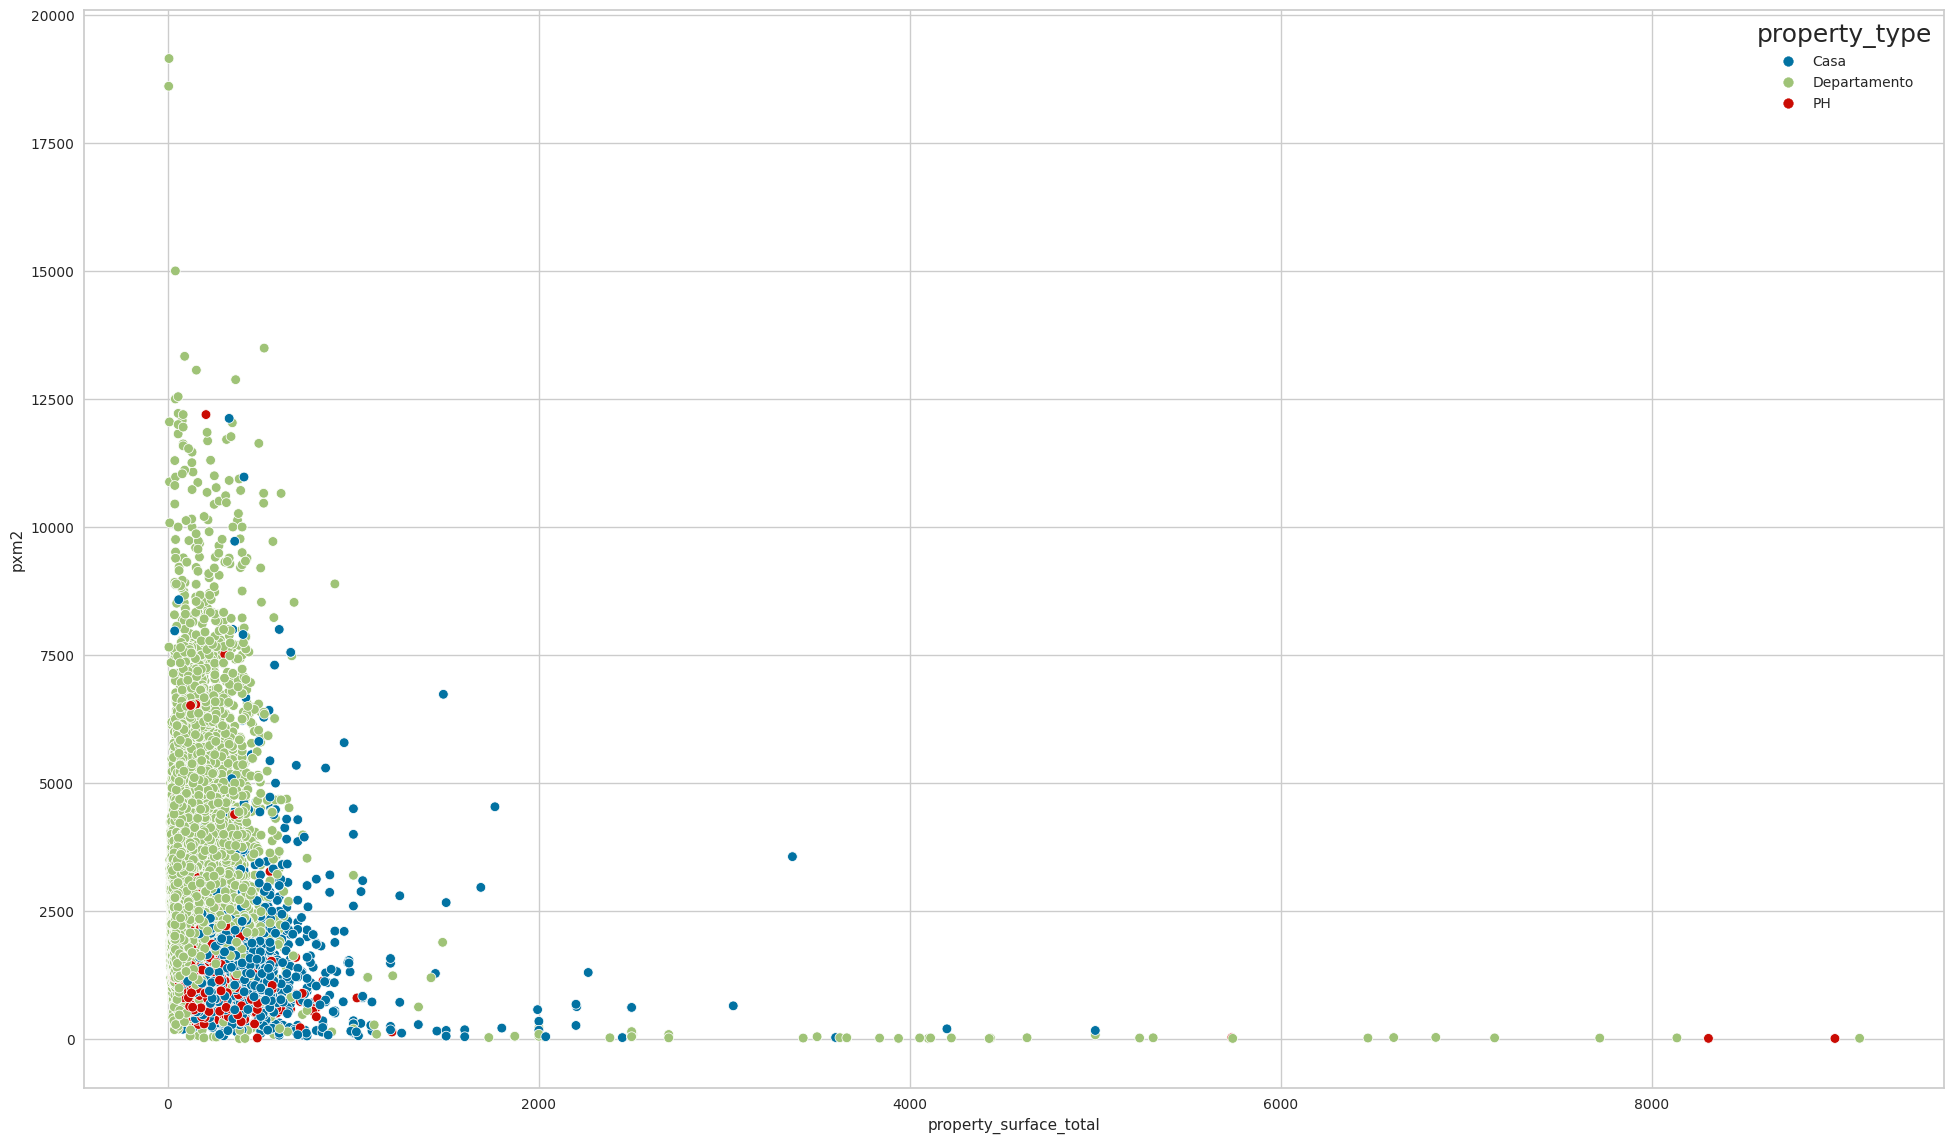

In [33]:
df_test = df_tprecio1[ df_tprecio1['property_surface_total'] < 10000 ]                      
df_test = df_test[df_test['pxm2'] < 20000]                     

sns.scatterplot(data=df_test, x='property_surface_total', y="pxm2", hue="property_type") # reemplazar df_test por df_tprecio1 una vez arreglado

# Ejercicio 4(?)

In [34]:
#Creamos el modelo
knn = KNeighborsClassifier()

#Miramos los parámetros por defecto
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [35]:
#Entrenamos el modelo
knn.fit(x_train, y_train)

#Predicción sobre test
y_pred = knn.predict(x_test)

print('Predicciones correctas: ', np.sum(y_test == y_pred))
print('Total: ', len(y_test))
print(accuracy_score(y_test,y_pred))

NameError: name 'x_train' is not defined

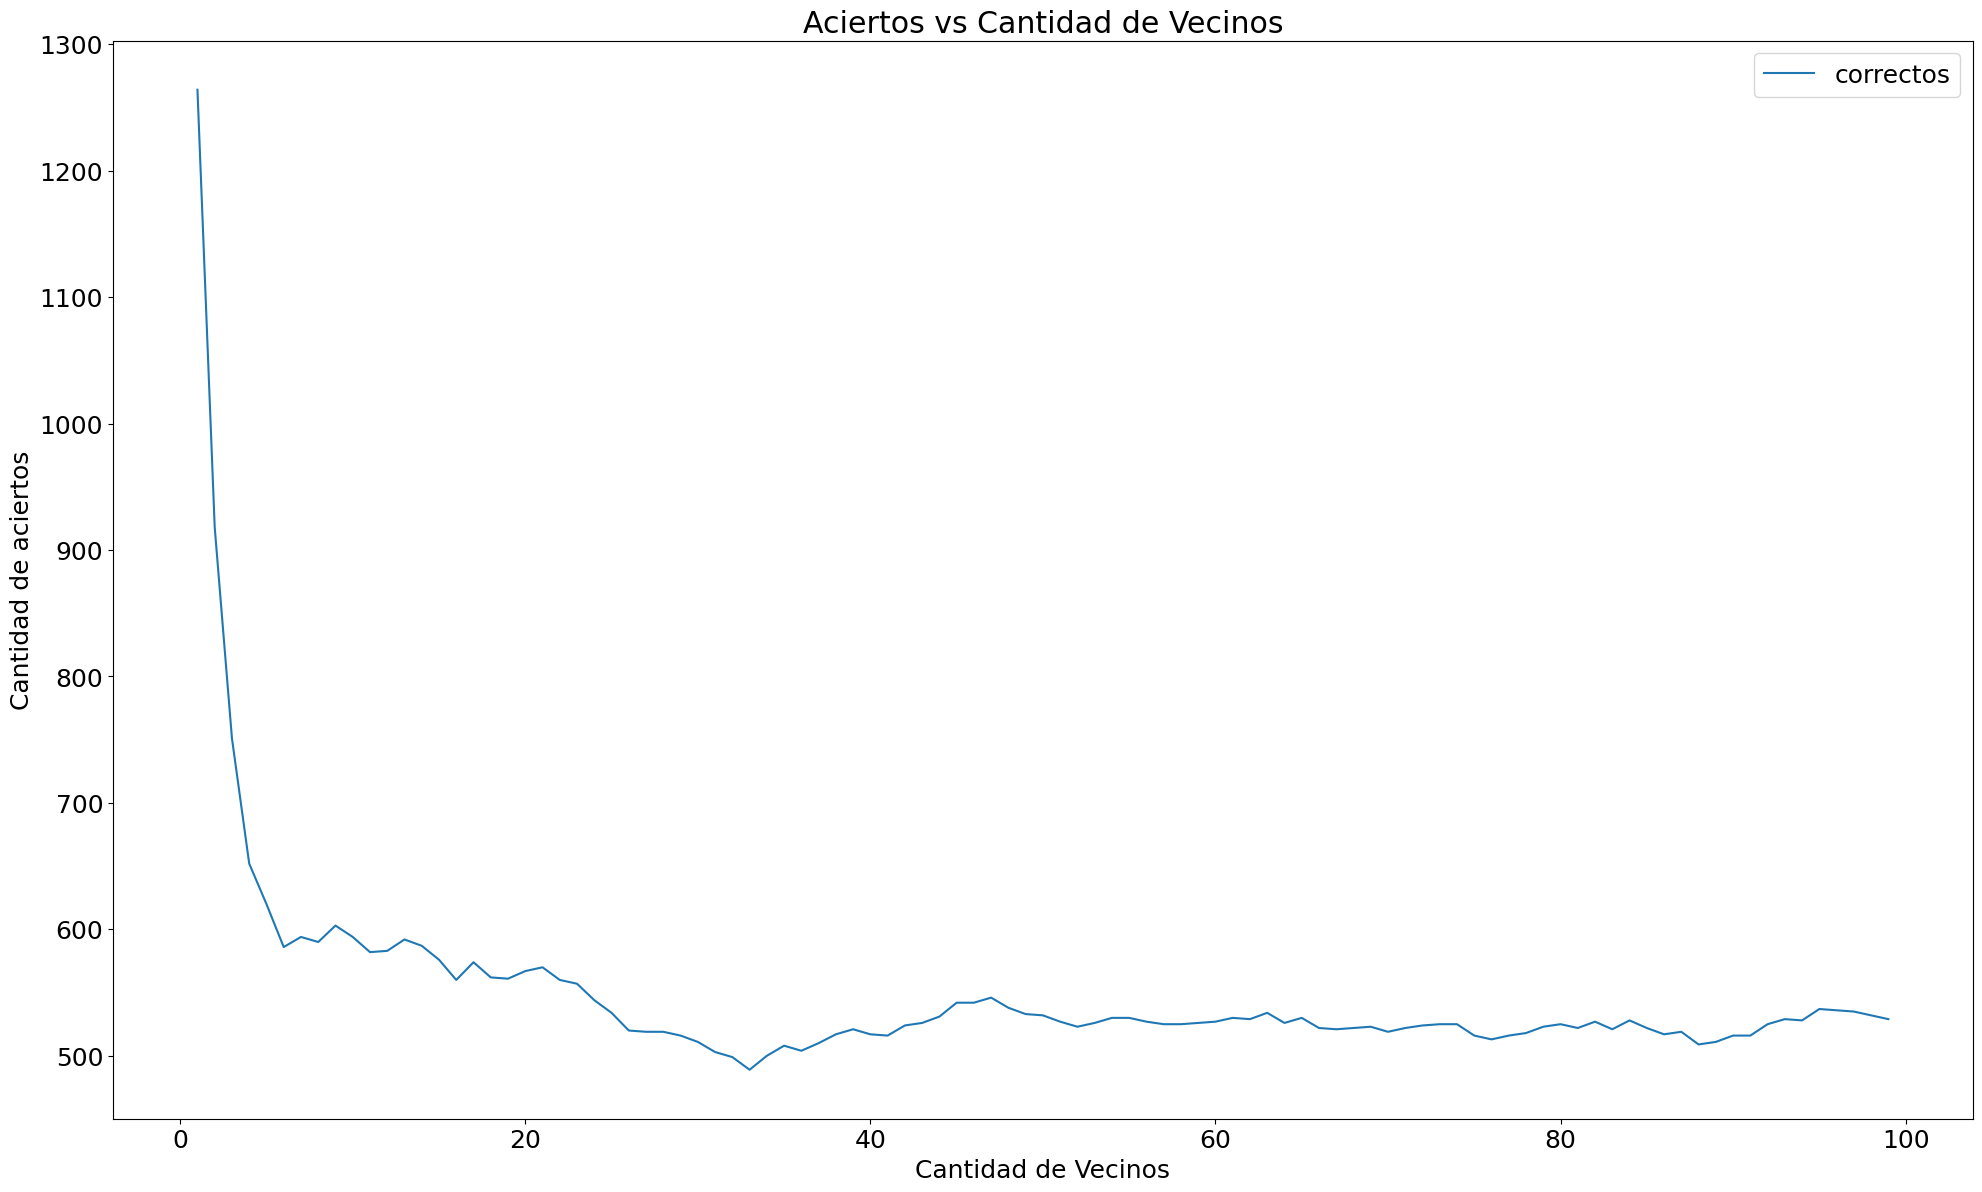

In [ ]:
metrics = [] #cantidad de vecinos y cantidad de aciertos

k_range=range(1, 100)#len(x_test)) # vecinos desde 1 hasta cantidad total de puntos en test

for n in k_range:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    metrics.append((n, (y_test == y_pred).sum()))

df_metrics = pd.DataFrame(metrics, columns=['cant_vecinos', 'correctos'])

ax = df_metrics.plot( x='cant_vecinos', 
                      y='correctos',
                      title='Aciertos vs Cantidad de Vecinos'
                     )

ax.set_ylabel("Cantidad de aciertos")
ax.set_xlabel("Cantidad de Vecinos")
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0cf69c3d-aa8c-478a-9384-e5da0f7d7007' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>